In [1]:
import numpy as np

In [2]:
from numpy.linalg import matrix_rank

In [3]:
import matplotlib.pyplot as plt

In [4]:
def commute(A,B):
    return np.matmul(A,B)-np.matmul(B,A)

In [5]:
def ordercomplexsu(A,B,m):
    BASIS=np.zeros((np.power(m,2)+1,np.power(m,2)),dtype=complex)
    BASIS[0]+=np.matrix.flatten(A)
    BASIS[1]+=np.matrix.flatten(B)
    j=2
    BASIS[2]+=np.matrix.flatten(commute(A,B))
    if matrix_rank(BASIS)>j:
        j+=1
    else: 
        return 0
    l=np.zeros((np.power(m,2)), dtype=int)
    l[0]=0
    l[1]=2
    l[2]=3
    for d in range(3, np.power(m,2)):
        for i in range(l[d-2], l[d-1]):
            COM=np.matrix.flatten(commute(A,BASIS[i].reshape(m,m))) 
            BASIS[j]+=COM
            if matrix_rank(BASIS)>j:
                j+=1
            else:
                BASIS[j]-=COM
            COM=np.matrix.flatten(commute(B,BASIS[i].reshape(m,m)))        
            BASIS[j]+=COM
            if matrix_rank(BASIS)>j:
                j+=1
            else:
                BASIS[j]-=COM
            if j>= np.power(m,2)-1:
                return d
        l[d]+=j
    return 0

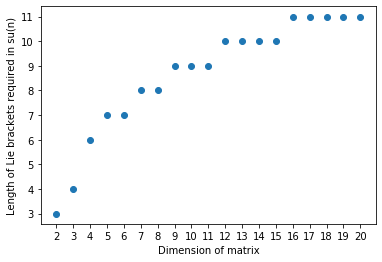

In [11]:
v=range(2,21)
d=np.zeros(19)
for m in v:
    A=np.random.rand(m,m)+np.random.rand(m,m)*1j
    B=np.random.rand(m,m)+np.random.rand(m,m)*1j
    A=(A-np.conj(np.transpose(A)))/2
    B=(B-np.conj(np.transpose(B)))/2
    A=A-np.trace(A)*np.eye(m)
    B=B-np.trace(B)*np.eye(m)
    d[m-2]=ordercomplexsu(A,B,m)
plt.scatter(v,d) 
plt.xticks(v)
plt.xlabel('Dimension of matrix')
plt.ylabel('Length of Lie brackets required in su(n)')
plt.savefig('sun.png')